### Notebook para evaluar la separación de imagenes de distitnos modelos iteraciones del mismo

2025-09-19 14:36:53.521246: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-09-19 14:36:53.526892: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-09-19 14:36:53.537920: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1758303413.555184   74762 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1758303413.560801   74762 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1758303413.574965   74762 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

Usando fashion como dataset


E0000 00:00:1758303416.916205   74762 cuda_executor.cc:1228] INTERNAL: CUDA Runtime error: Failed call to cudaGetRuntimeVersion: Error loading CUDA libraries. GPU will not be used.: Error loading CUDA libraries. GPU will not be used.
W0000 00:00:1758303416.916748   74762 gpu_device.cc:2341] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


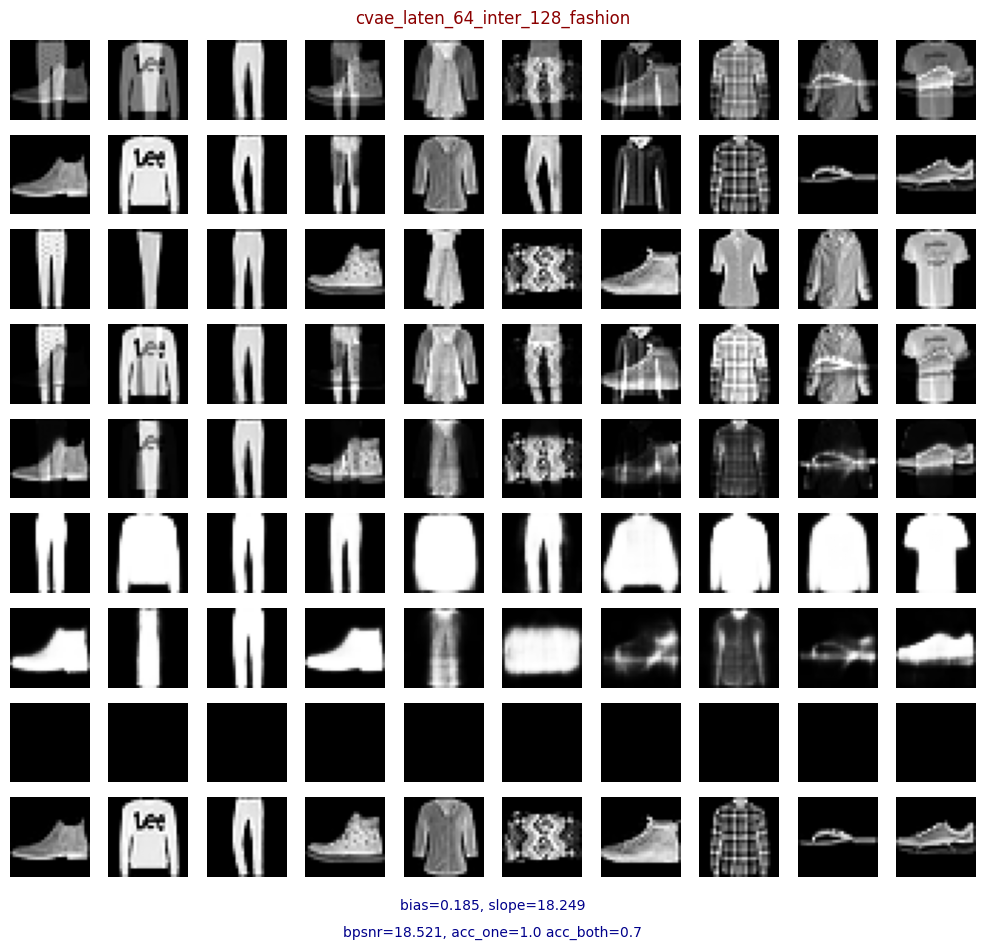

In [1]:
import os
import sys

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "../..")))
from experiments import load
from CROP_models.crop import crop

dataset="fashion"

data = load.data(dataset=dataset)
predictor = load.predictor(dataset=dataset)
x_train = data["x_train"]
x_test = data["x_test"]
x_val = data["x_val"]
y_train = data["y_train"]
y_test = data["y_test"]
y_val = data["y_val"]
x_train_1 = data["x_train_1"]
y_train_1 = data["y_train_1"]  
x_test_1  =data["x_test_1"]
y_test_1  =data["y_test_1"]


model = load.cvae(lat=64, inter=128,dataset=dataset)


# bias default: 0.22
# slope default: 22

# bias optimizados: 0.18495822150909808,
# slope optimizados: 18.248678323921897

crop_f0 = crop(model,predictor=predictor,
               data=data,bias=0.18495822150909808,slope=18.248678323921897 ,beta=1)

start =0
end =start+10

metrics  = crop_f0.unmix(
    x_test[start:end],
    x_test_1[start:end],
    y_test[start:end],
    y_test_1[start:end],
    show_image=True)


In [2]:
import os
import sys

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "../..")))
from experiments import load
from CROP_models.crop import crop

dataset="fashion"

data = load.data(dataset=dataset)
predictor = load.predictor(dataset=dataset)
x_train = data["x_train"]
x_test = data["x_test"]
x_val = data["x_val"]
y_train = data["y_train"]
y_test = data["y_test"]
y_val = data["y_val"]
x_train_1 = data["x_train_1"]
y_train_1 = data["y_train_1"]  
x_test_1  =data["x_test_1"]
y_test_1  =data["y_test_1"]


model = load.cvae(lat=64, inter=128,dataset=dataset)

crop_f0 = crop(model,predictor=predictor,
               data=data,bias=0.2562,slope=10.0067 ,beta=1)


#crop_f0 = crop(model,predictor=predictor,
#               data=data,bias=0.18495822150909808,slope= 18.248678323921897,beta=1)

start =0
end =start+1000


metrics  = crop_f0.unmix(
    x_test[start:end],
    x_test_1[start:end],
    y_test[start:end],
    y_test_1[start:end],
)


print(metrics["bpsnr"])
print(metrics["acc_at_least_one"])
print(metrics["acc_both"])


Usando fashion como dataset
(<tf.Tensor: shape=(), dtype=float32, numpy=17.941194534301758>, <tf.Tensor: shape=(), dtype=float32, numpy=2.8865158557891846>)
0.953
0.573


# Rsumen de estadisticas:(usando 1000 imagenes)

## Antes de los cambios: 
#### Parametros: bias: 0.22 slope: 22
 - Bpsnr:  bpsnr_mean:  14.927 bpsnr_std: 2.45 

 - Acc:  Acc_at_least_one: 0.969  Acc_both: 0.564
 
 ## Despues de los cambios: 
#### Parametros: bias: 0.22 slope: 22
 - Bpsnr:  bpsnr_mean:  17.96  bpsnr_std: 3.50

 - Acc:  Acc_at_least_one: 0.966  Acc_both: 0.617
 
## Despues de los cambios y parametros optimizados: 
#### Parametros: bias=0.18495822150909808  slope= 18.248678323921897
 - Bpsnr:  bpsnr_mean:  18.39  bpsnr_std: 3.05

 - Acc:  Acc_at_least_one: 0.967  Acc_both: 0.653
 
guardar el resutaldo parcial del acc, ver evolucion pasos acc. (usando dataset de testeo) 

2025-09-23 21:22:26.703184: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-09-23 21:22:26.707736: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-09-23 21:22:26.720009: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1758673346.740554  566391 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1758673346.746260  566391 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1758673346.761082  566391 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

Usando fashion como dataset


2025-09-23 21:22:29.364741: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2025-09-23 21:22:29.364758: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:178] verbose logging is disabled. Rerun with verbose logging (usually --v=1 or --vmodule=cuda_diagnostics=1) to get more diagnostic output from this module
2025-09-23 21:22:29.364763: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:183] retrieving CUDA diagnostic information for host: pc-santi
2025-09-23 21:22:29.364767: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:190] hostname: pc-santi
2025-09-23 21:22:29.364828: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:197] libcuda reported version is: 575.64.3
2025-09-23 21:22:29.364846: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:201] kernel reported version is: 575.64.3
2025-

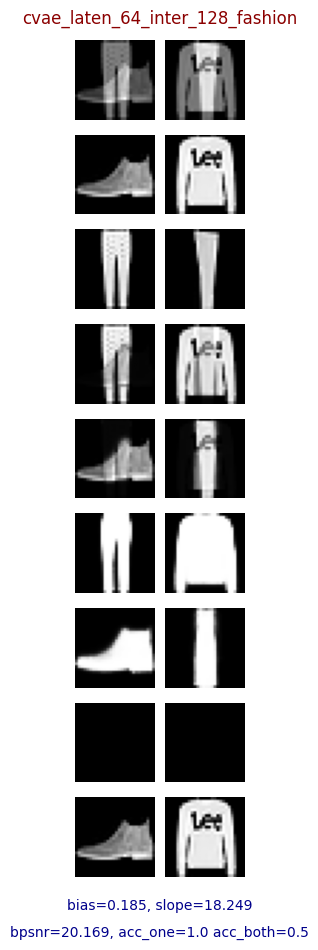

(<tf.Tensor: shape=(), dtype=float32, numpy=20.168851852416992>, <tf.Tensor: shape=(), dtype=float32, numpy=1.760976791381836>)
1.0
0.5


In [1]:
import os
import sys

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "../..")))
from experiments import load
from CROP_models.crop import crop

dataset="fashion"

data = load.data(dataset=dataset)
predictor = load.predictor(dataset=dataset)
x_train = data["x_train"]
x_test = data["x_test"]
x_val = data["x_val"]
y_train = data["y_train"]
y_test = data["y_test"]
y_val = data["y_val"]
x_train_1 = data["x_train_1"]
y_train_1 = data["y_train_1"]  
x_test_1  =data["x_test_1"]
y_test_1  =data["y_test_1"]


model = load.cvae(lat=64, inter=128,dataset=dataset)

#crop_f0 = crop(model,predictor=predictor,
#               data=data,bias=0.2562,slope=10.0067 ,beta=1)


crop_f0 = crop(model,predictor=predictor,
               data=data,bias=0.18495822150909808,slope= 18.248678323921897,beta=1)

start =0
end =start+2


metrics  = crop_f0.unmix(
    x_test[start:end],
    x_test_1[start:end],
    y_test[start:end],
    y_test_1[start:end],
    show_image=True)


print(metrics["bpsnr"])
print(metrics["acc_at_least_one"])
print(metrics["acc_both"])


Usando fashion como dataset


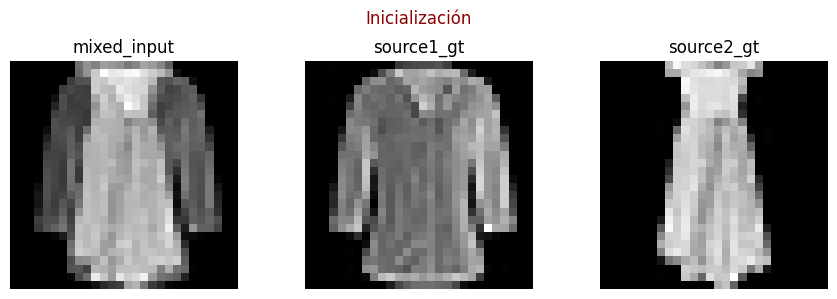

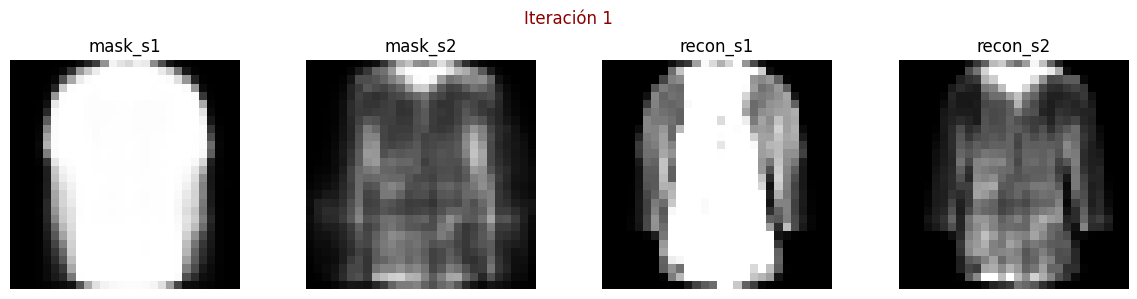

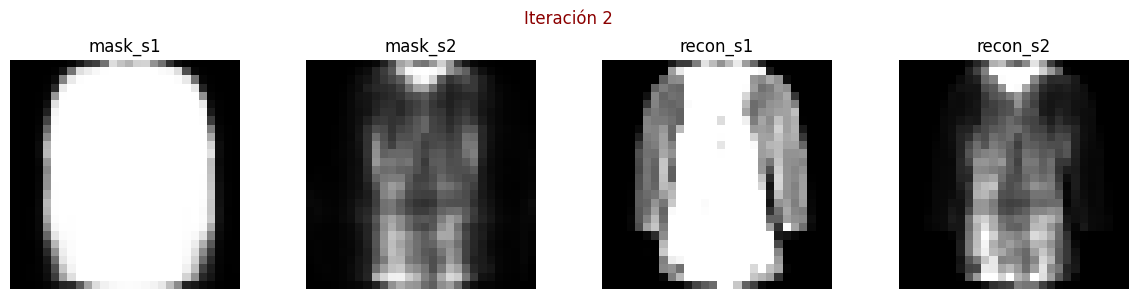

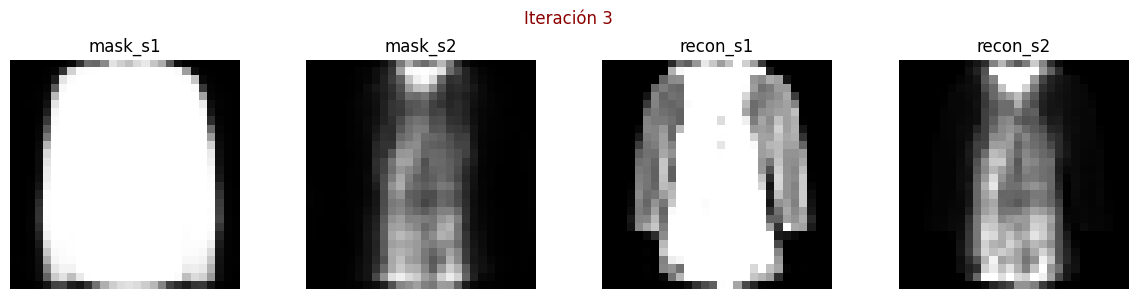

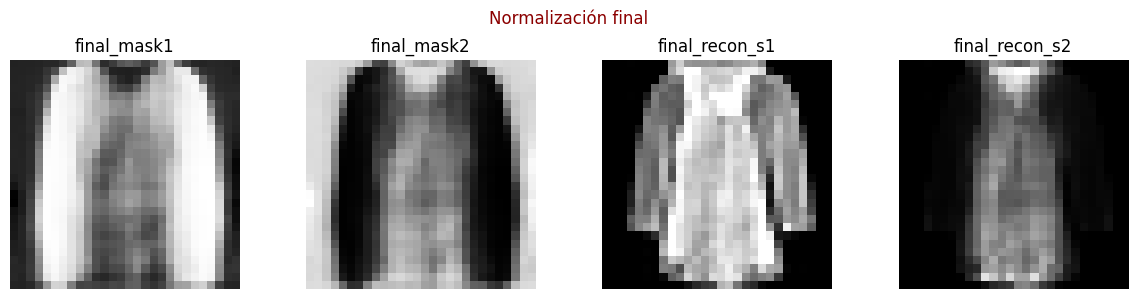

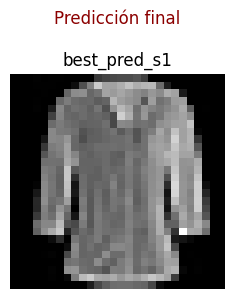

(<tf.Tensor: shape=(), dtype=float32, numpy=16.16984748840332>, <tf.Tensor: shape=(), dtype=float32, numpy=4.05341911315918>)
1.0
1.0


In [4]:
import os
import sys

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "../..")))
from experiments import load
from CROP_models.crop import crop

dataset="fashion"

data = load.data(dataset=dataset)
predictor = load.predictor(dataset=dataset)
x_train = data["x_train"]
x_test = data["x_test"]
x_val = data["x_val"]
y_train = data["y_train"]
y_test = data["y_test"]
y_val = data["y_val"]
x_train_1 = data["x_train_1"]
y_train_1 = data["y_train_1"]  
x_test_1  =data["x_test_1"]
y_test_1  =data["y_test_1"]


model = load.cvae(lat=64, inter=128,dataset=dataset)

#crop_f0 = crop(model,predictor=predictor,
#               data=data,bias=0.2562,slope=10.0067 ,beta=1)


crop_f0 = crop(model,predictor=predictor,
               data=data,bias=0.18495822150909808,slope= 18.248678323921897,beta=1)

start =4
end =start+2


metrics  = crop_f0.unmix(
    x_test[start:end],
    x_test_1[start:end],
    y_test[start:end],
    y_test_1[start:end],
    show_image=False,
    debug_images=True)


print(metrics["bpsnr"])
print(metrics["acc_at_least_one"])
print(metrics["acc_both"])